In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage.filters import threshold_otsu
from sklearn.cluster import KMeans

In [2]:
data = loadmat('data/Brain.mat')
T1 = data['T1']         # MRI slices
label = data['label']   # Groud truth labels

print("MRI Data Shape:", T1.shape)
print("Label Shape:", label.shape)

MRI Data Shape: (362, 434, 10)
Label Shape: (362, 434, 10)


In [3]:
# Function to apply threshold-based segmentation
def threshold_segmentation(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    return binary

In [4]:
# Function to apply K-means clustering segmentation
def kmeans_segmentation(image, n_clusters=6):
    image_flat = image.flatten().reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(image_flat)
    segmented_image = kmeans.labels_.reshape(image.shape)
    return segmented_image

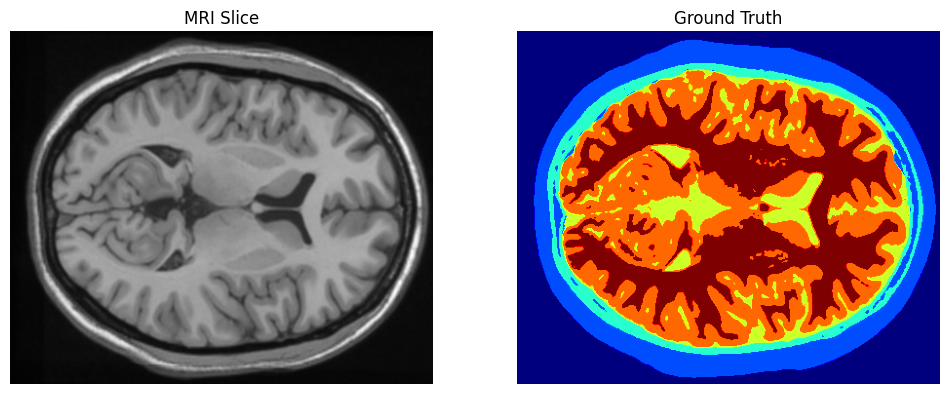

In [5]:
# Visualize an example slice and ground truth
def visualize_example(slice_idx):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("MRI Slice")
    plt.imshow(T1[:, :, slice_idx], cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Ground Truth")
    plt.imshow(label[:, :, slice_idx], cmap='jet')
    plt.axis('off')
    plt.show()

# Visualize slice 5 as an example
visualize_example(slice_idx=5)

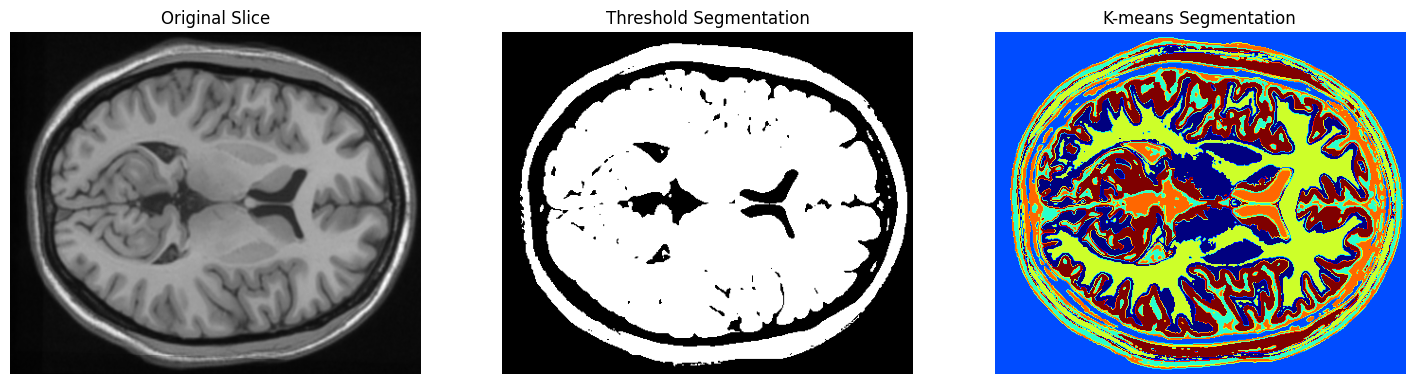

In [6]:
# Task 1: Apply Segmentation Methods
segmentation_results = {}

for slice_idx in range(T1.shape[2]):
    slice_image = T1[:, :, slice_idx]
    
    # Threshold Segmentation
    threshold_seg = threshold_segmentation(slice_image)
    segmentation_results[f"slice_{slice_idx}_threshold"] = threshold_seg
    
    # K-means Segmentation
    kmeans_seg = kmeans_segmentation(slice_image)
    segmentation_results[f"slice_{slice_idx}_kmeans"] = kmeans_seg

    # Visualization
    if slice_idx == 5:  # Show example for slice 5
        plt.figure(figsize=(18, 6))
        plt.subplot(1, 3, 1)
        plt.title("Original Slice")
        plt.imshow(slice_image, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.title("Threshold Segmentation")
        plt.imshow(threshold_seg, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.title("K-means Segmentation")
        plt.imshow(kmeans_seg, cmap='jet')
        plt.axis('off')
        plt.show()

In [7]:
# Dice similarity function
def dice_coefficient(pred, true, k = 1):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

In [8]:
# Task 2: Evaluation using Dice Coefficient
def evaluate_segmentation(pred, gt):
    return dice_coefficient(gt.flatten(), pred.flatten())

# Compare results for slice 5 as an example
slice_idx = 5
threshold_result = segmentation_results[f"slice_{slice_idx}_threshold"]
kmeans_result = segmentation_results[f"slice_{slice_idx}_kmeans"]
gt_label = label[:, :, slice_idx]

# Calculate Dice Coefficient
dice_threshold = evaluate_segmentation(threshold_result, gt_label)
dice_kmeans = evaluate_segmentation(kmeans_result, gt_label)

print(f"Dice Coefficient (Threshold Segmentation): {dice_threshold:.4f}")
print(f"Dice Coefficient (K-means Segmentation): {dice_kmeans:.4f}")

Dice Coefficient (Threshold Segmentation): 1.4173
Dice Coefficient (K-means Segmentation): 0.0309



Applying 3D K-means Segmentation...


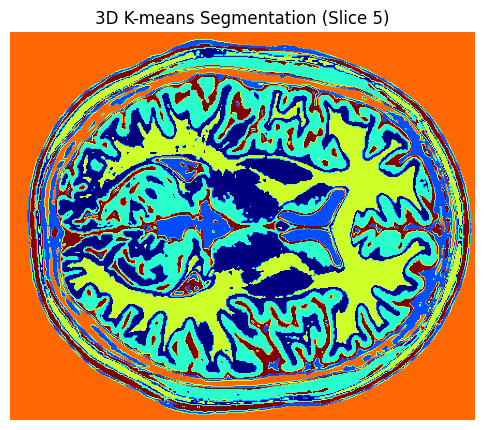

Dice Coefficient (3D K-means Segmentation): 0.0676

--- Summary of Dice Coefficients ---
Threshold Segmentation: 1.4173
2D K-means Segmentation: 0.0309
3D K-means Segmentation: 0.0676


In [9]:
# Task 3: Advanced 3D Segmentation using K-means
print("\nApplying 3D K-means Segmentation...")
T1_flat = T1.flatten().reshape(-1, 1)
kmeans_3d = KMeans(n_clusters=6, random_state=42).fit(T1_flat)
segmented_3d = kmeans_3d.labels_.reshape(T1.shape)

# Visualize 3D segmentation for slice 5
plt.figure(figsize=(6, 6))
plt.title("3D K-means Segmentation (Slice 5)")
plt.imshow(segmented_3d[:, :, 5], cmap='jet')
plt.axis('off')
plt.show()

# Evaluate 3D segmentation
dice_3d = evaluate_segmentation(segmented_3d[:, :, slice_idx], gt_label)
print(f"Dice Coefficient (3D K-means Segmentation): {dice_3d:.4f}")

# Summary of Results
print("\n--- Summary of Dice Coefficients ---")
print(f"Threshold Segmentation: {dice_threshold:.4f}")
print(f"2D K-means Segmentation: {dice_kmeans:.4f}")
print(f"3D K-means Segmentation: {dice_3d:.4f}")